In [2]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


# House Price prediction Model

# understanding the data

Online property companies offer valuations of houses using machine learning techniques. The aim of this report is to predict the house sales in King County, Washington State, USA using Multiple Linear Regression (MLR). The dataset consisted of historic data of houses sold
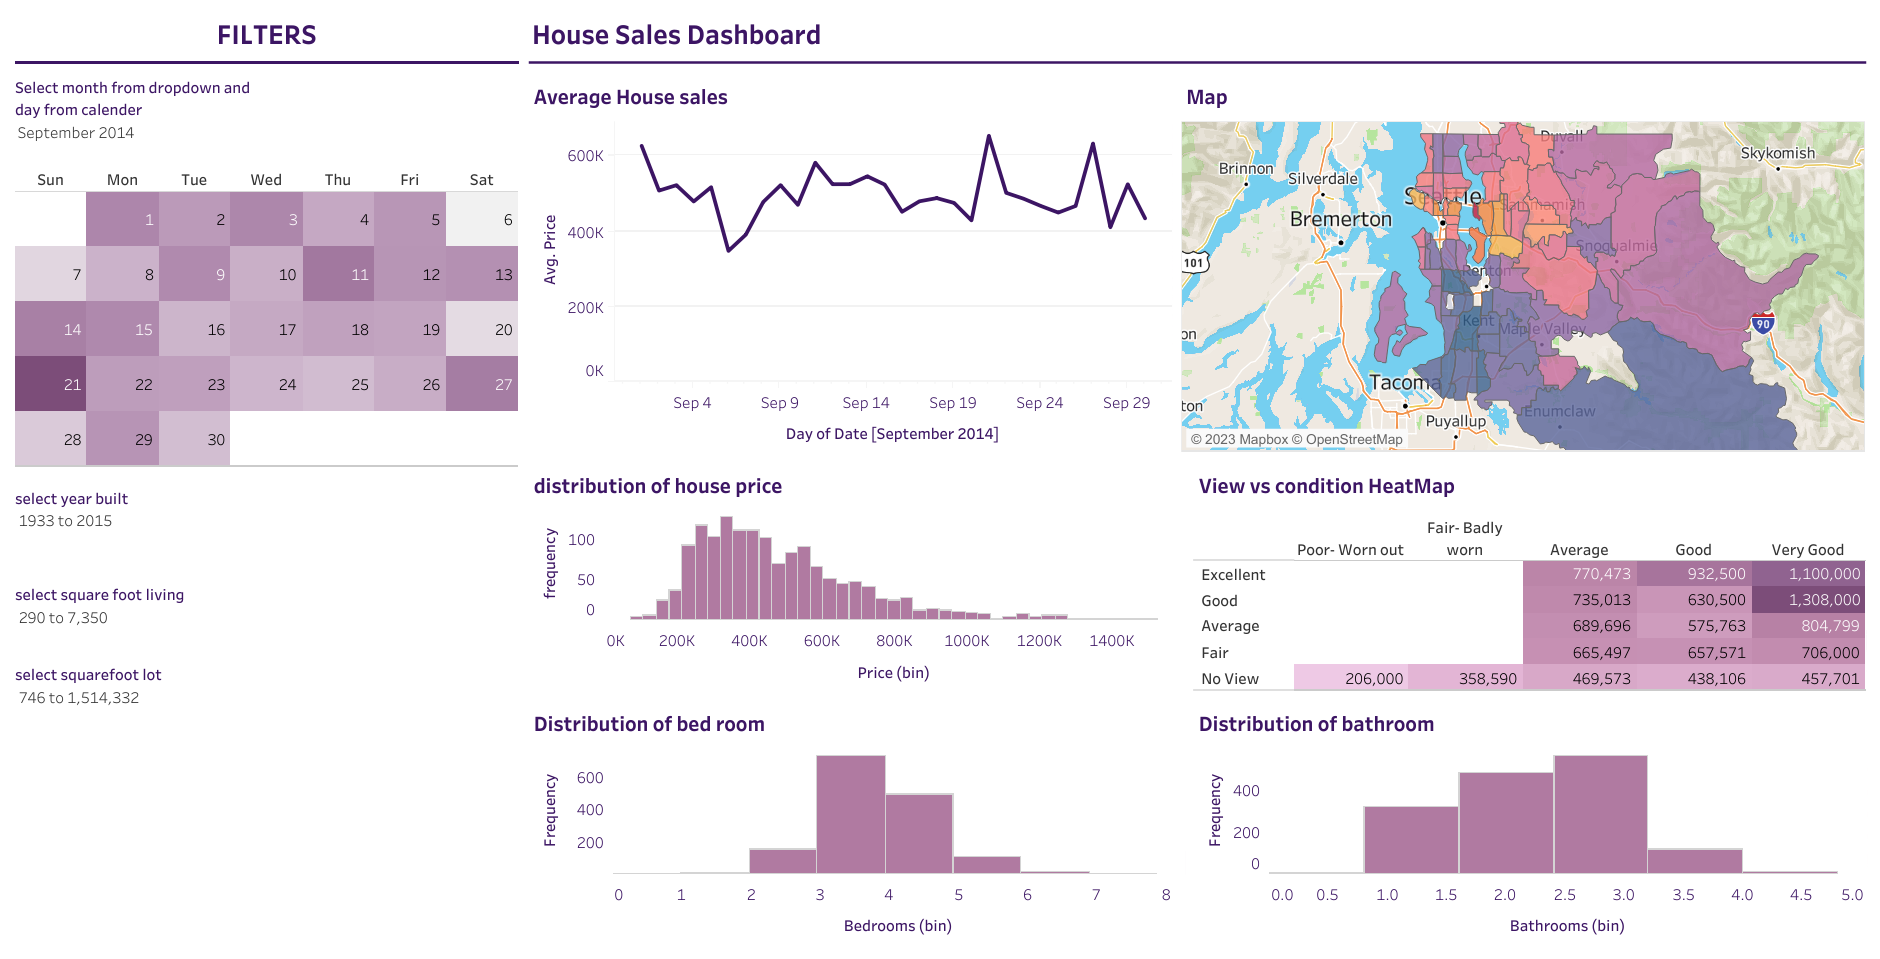.

# Import the dependencies

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [4]:
df = pd.read_csv('/content/drive/MyDrive/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# lets begin the preprocessing



*   remove unwanted columns
*   Correct the datatypes



In [5]:
df.drop(['id','date','zipcode','lat','long','sqft_living15','sqft_lot15'],inplace=True,axis=1)

In [6]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0


In [9]:
df['bathrooms'] = df['bathrooms'].apply(lambda x: np.int32(np.round(x)))

In [10]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1,1180,5650,1.0,0,0,3,7,1180,0,1955,0
1,538000.0,3,2,2570,7242,2.0,0,0,3,7,2170,400,1951,1991
2,180000.0,2,1,770,10000,1.0,0,0,3,6,770,0,1933,0
3,604000.0,4,3,1960,5000,1.0,0,0,5,7,1050,910,1965,0
4,510000.0,3,2,1680,8080,1.0,0,0,3,8,1680,0,1987,0


In [11]:
df.floors = df.floors.apply(lambda x : np.int32(np.round(x)))

In [12]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991
2,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0


Lets check the correlation between the data


<Axes: >

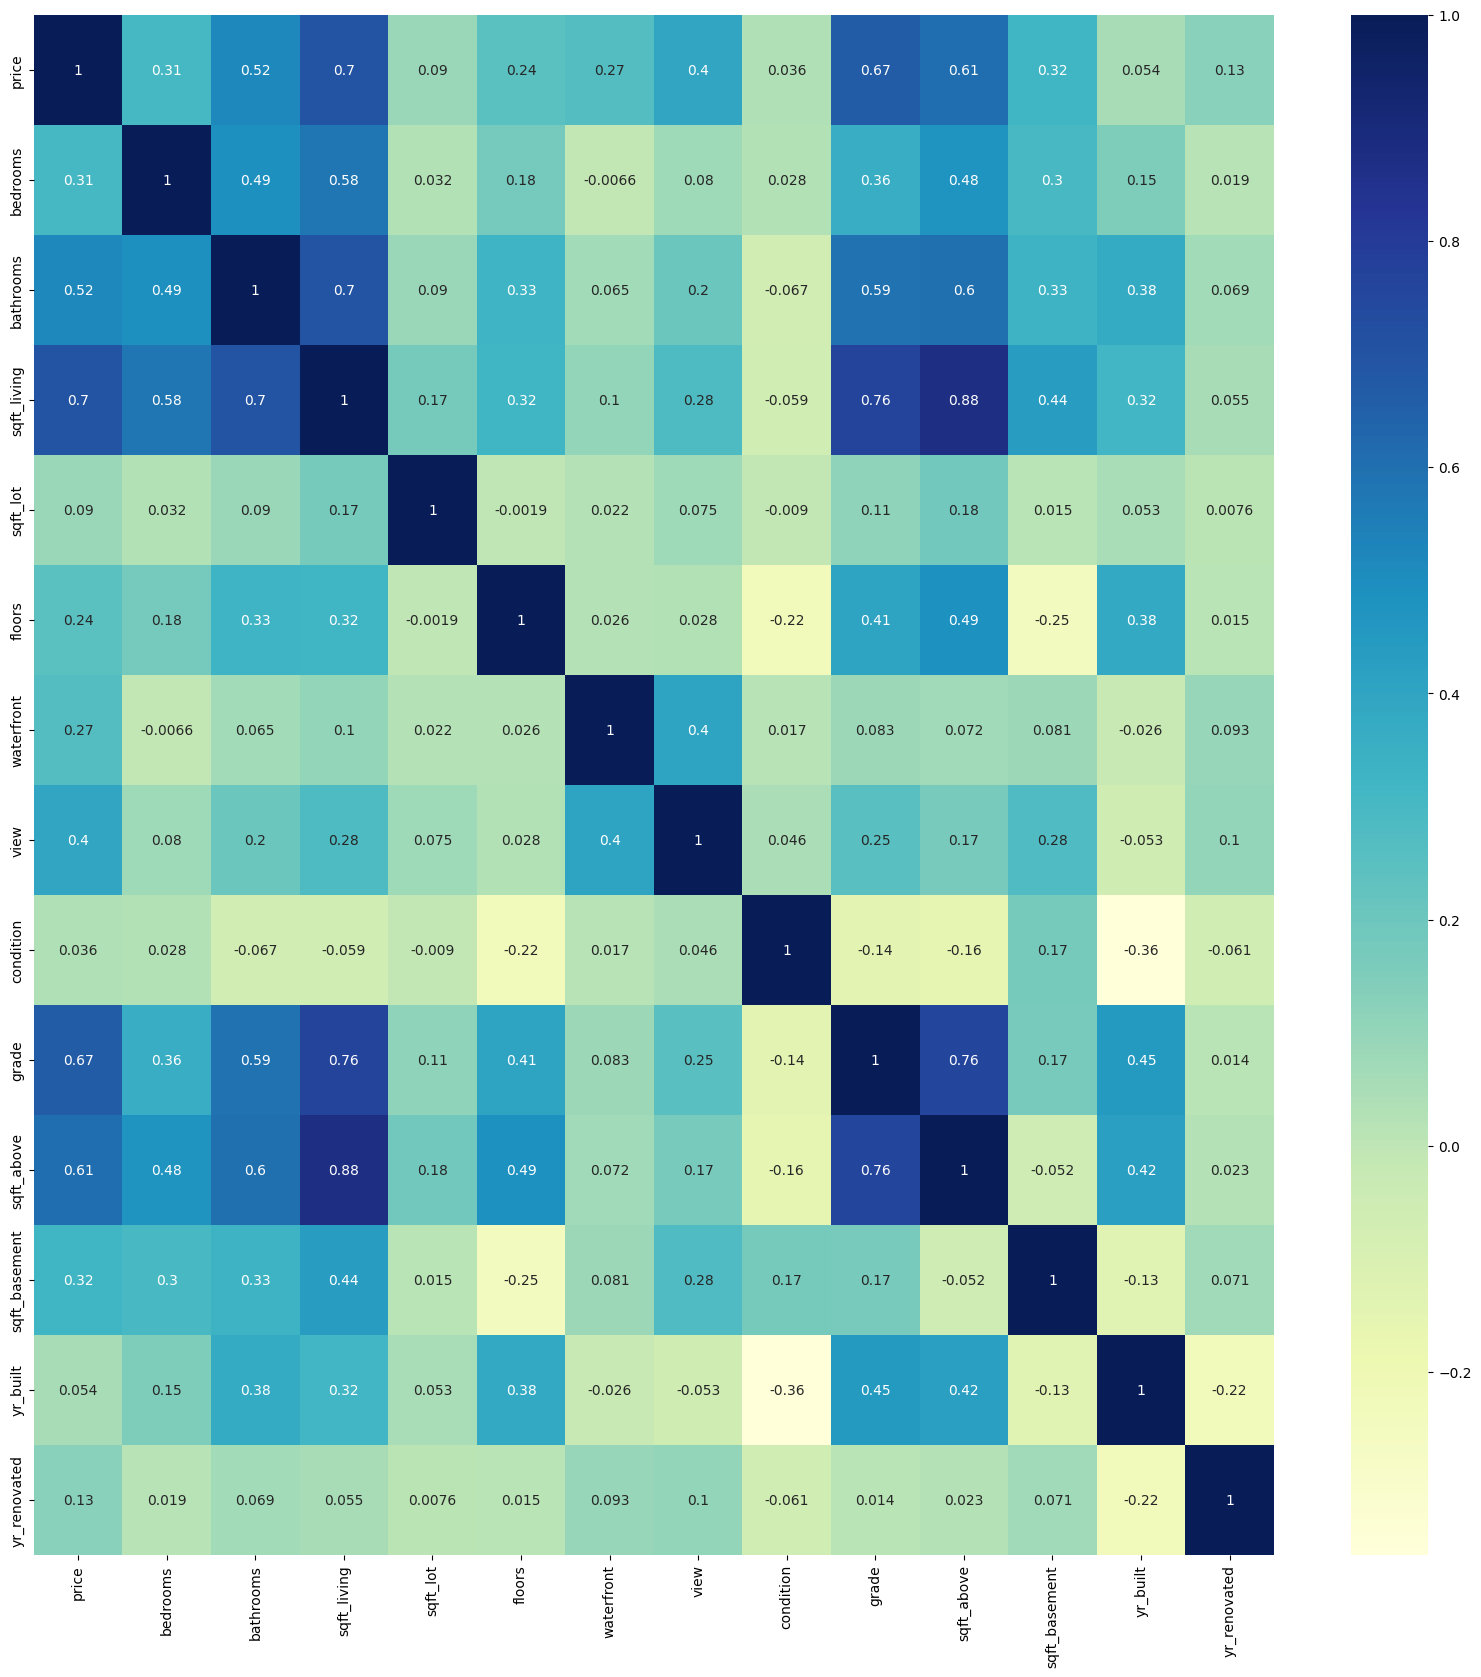

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

## Lets Preprocess More

In [19]:
df.drop(['sqft_lot'],axis=1,inplace=True)

In [20]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1,1180,1,0,0,3,7,1180,0,1955,0
1,538000.0,3,2,2570,2,0,0,3,7,2170,400,1951,1991
2,180000.0,2,1,770,1,0,0,3,6,770,0,1933,0
3,604000.0,4,3,1960,1,0,0,5,7,1050,910,1965,0
4,510000.0,3,2,1680,1,0,0,3,8,1680,0,1987,0


<Axes: >

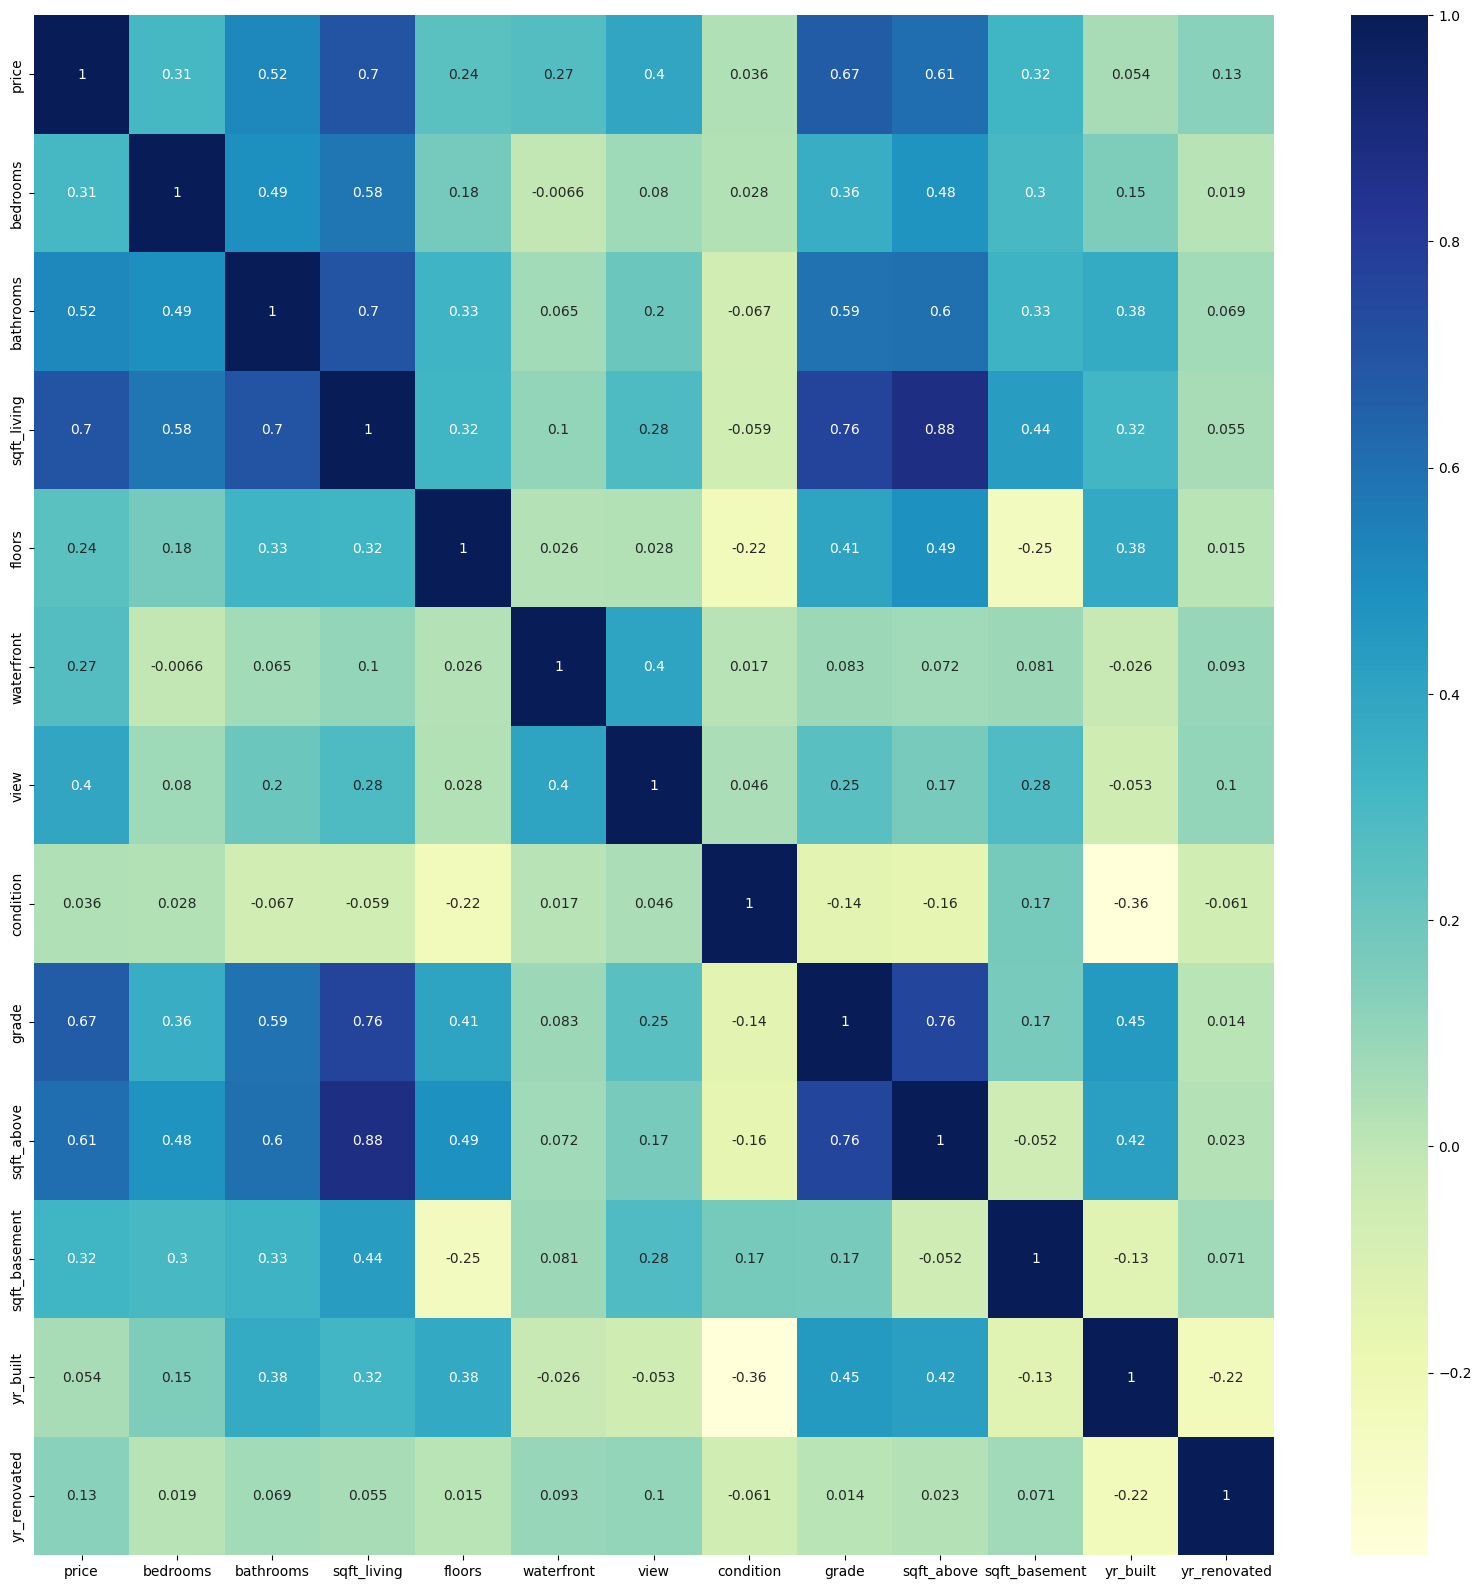

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

# My Inference Based on correlation Matrix

sqft_living,batrooms,grade sqft_above have highly poitive correlation with price which means when these increases price increases. inputs like waterfront,bedrooms etc also have positive correlation. even though year_built dont have direct correlation with price. it have correlation with grade. condition have a negative correlation with grade

Adding new feature age (2014 - yearbuilt) and check if it have correlation

2014 bcause the dataset is collected in the year 2014


In [24]:
df['age'] = 2014 - df['yr_built']
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,age
0,221900.0,3,1,1180,1,0,0,3,7,1180,0,1955,0,59
1,538000.0,3,2,2570,2,0,0,3,7,2170,400,1951,1991,63
2,180000.0,2,1,770,1,0,0,3,6,770,0,1933,0,81
3,604000.0,4,3,1960,1,0,0,5,7,1050,910,1965,0,49
4,510000.0,3,2,1680,1,0,0,3,8,1680,0,1987,0,27


<Axes: >

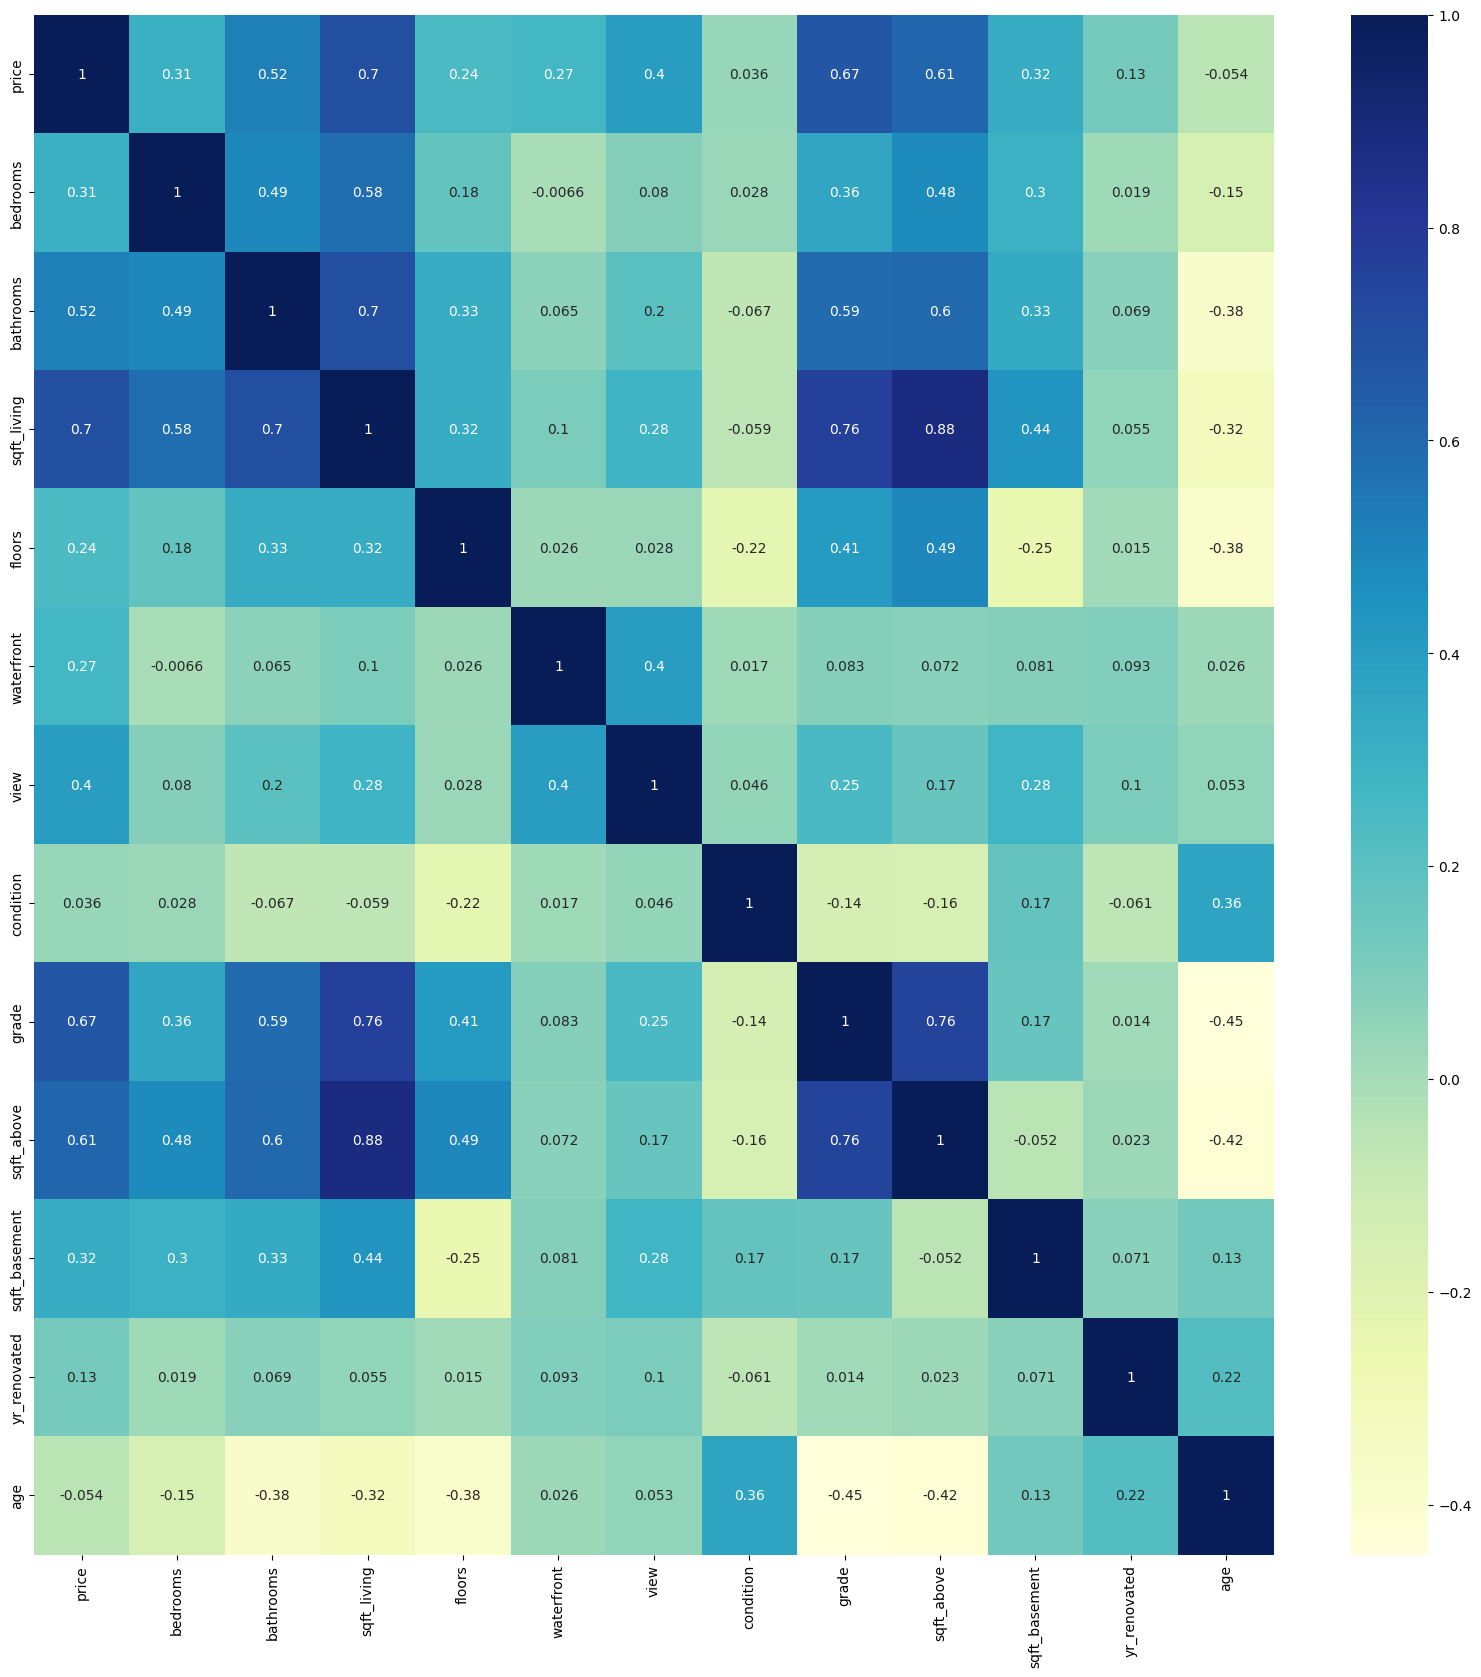

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

In [25]:
df.drop(['yr_built'],axis=1,inplace=True)

<Axes: >

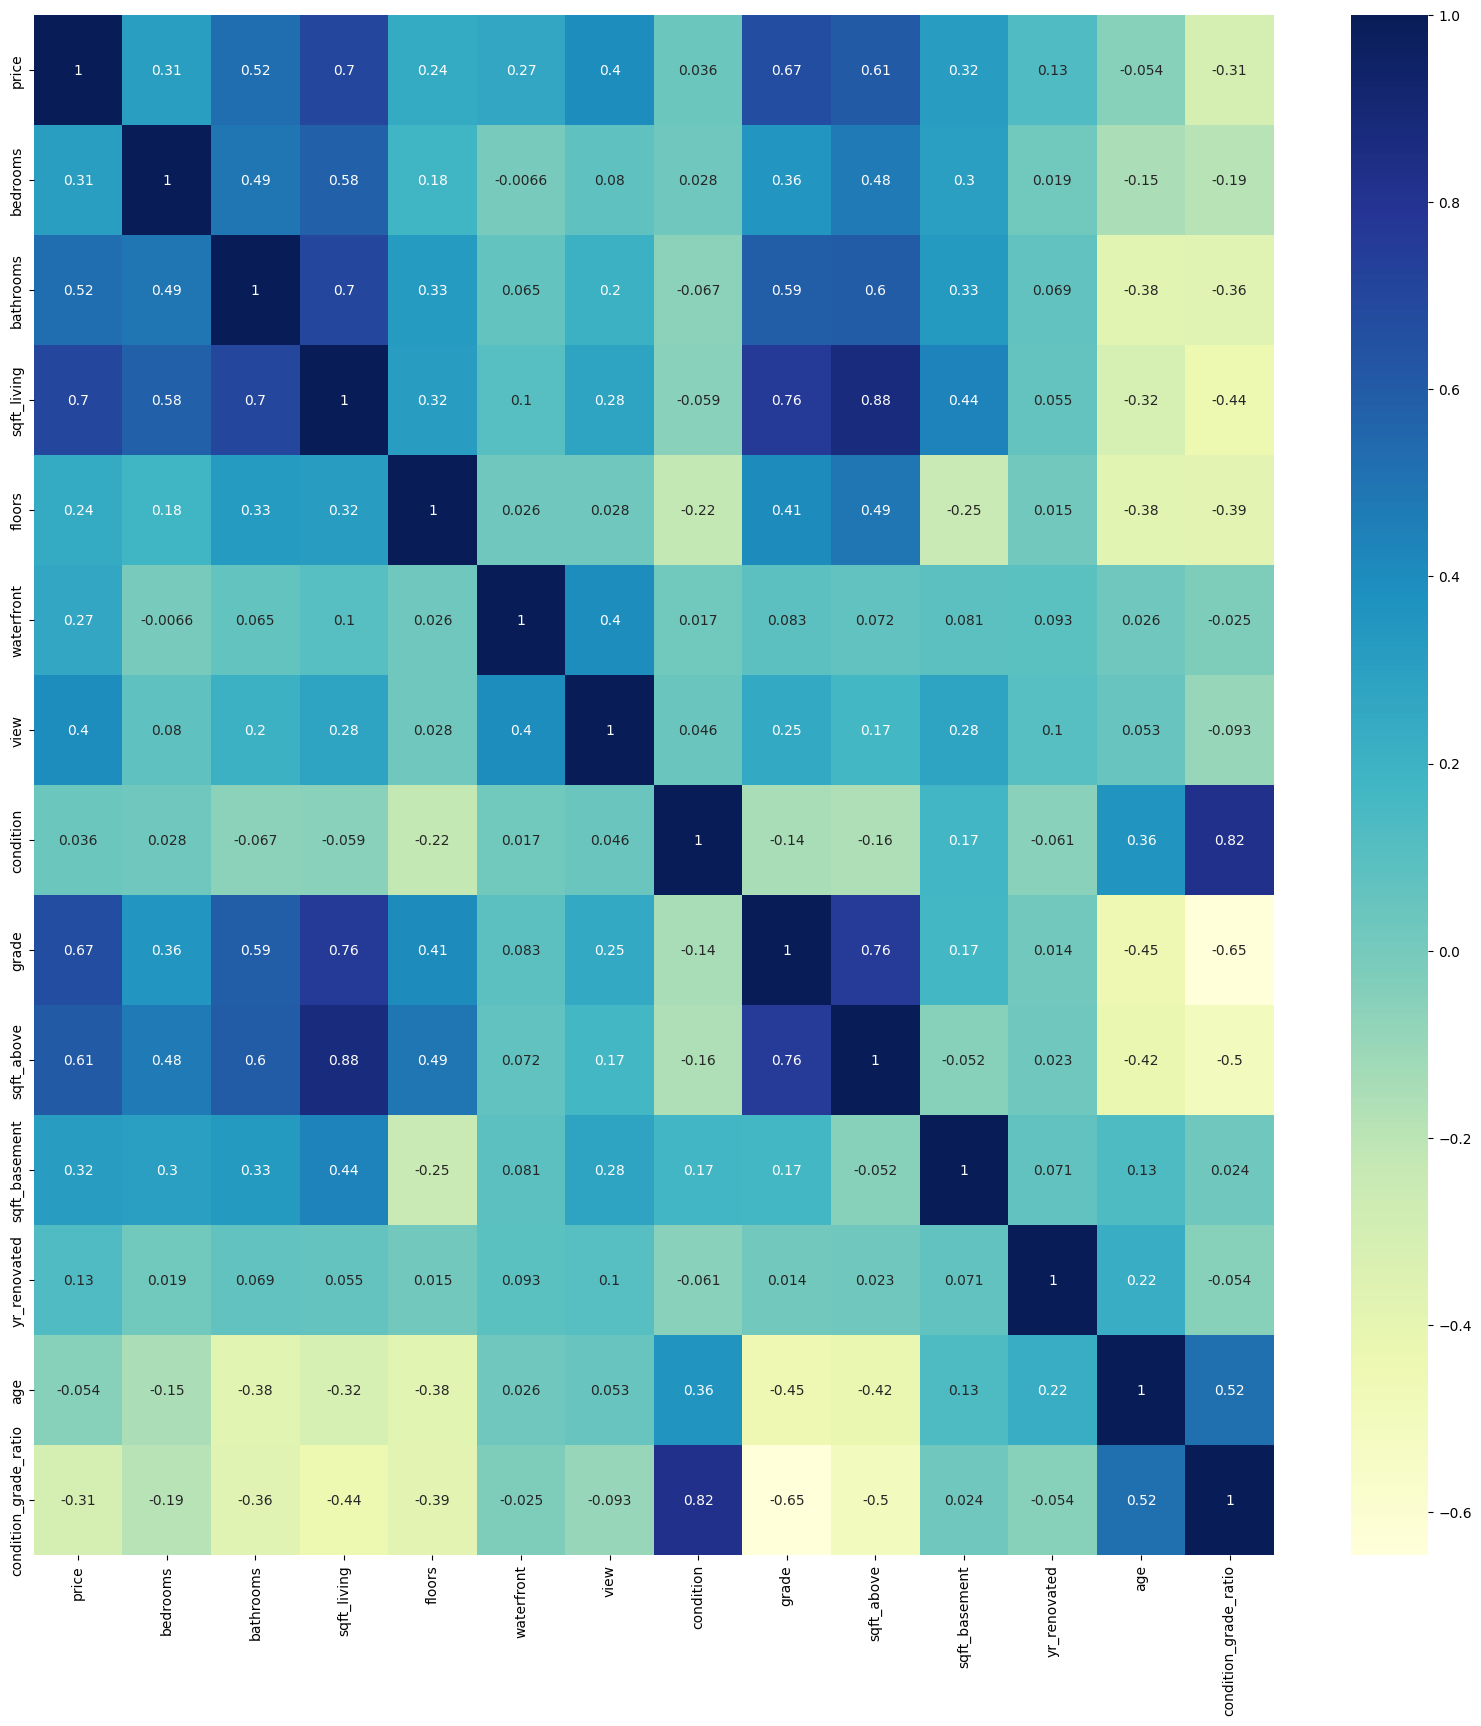

In [27]:
df['condition_grade_ratio'] = df['condition'] / df['grade']
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

Final table


In [29]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,age,condition_grade_ratio
0,221900.0,3,1,1180,1,0,0,3,7,1180,0,0,59,0.428571
1,538000.0,3,2,2570,2,0,0,3,7,2170,400,1991,63,0.428571
2,180000.0,2,1,770,1,0,0,3,6,770,0,0,81,0.500000
3,604000.0,4,3,1960,1,0,0,5,7,1050,910,0,49,0.714286
4,510000.0,3,2,1680,1,0,0,3,8,1680,0,0,27,0.375000


In [28]:
inputs = df.drop(['price'],axis=1)
outputs = df['price']

In [30]:
inputs.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,age,condition_grade_ratio
0,3,1,1180,1,0,0,3,7,1180,0,0,59,0.428571
1,3,2,2570,2,0,0,3,7,2170,400,1991,63,0.428571
2,2,1,770,1,0,0,3,6,770,0,0,81,0.500000
3,4,3,1960,1,0,0,5,7,1050,910,0,49,0.714286
4,3,2,1680,1,0,0,3,8,1680,0,0,27,0.375000


In [31]:
outputs.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [34]:
X,y = np.array(inputs),np.array(outputs).reshape(len(outputs),1)
print(X)
print(y)

[[3.00000000e+00 1.00000000e+00 1.18000000e+03 ... 0.00000000e+00
  5.90000000e+01 4.28571429e-01]
 [3.00000000e+00 2.00000000e+00 2.57000000e+03 ... 1.99100000e+03
  6.30000000e+01 4.28571429e-01]
 [2.00000000e+00 1.00000000e+00 7.70000000e+02 ... 0.00000000e+00
  8.10000000e+01 5.00000000e-01]
 ...
 [2.00000000e+00 1.00000000e+00 1.02000000e+03 ... 0.00000000e+00
  5.00000000e+00 4.28571429e-01]
 [3.00000000e+00 2.00000000e+00 1.60000000e+03 ... 0.00000000e+00
  1.00000000e+01 3.75000000e-01]
 [2.00000000e+00 1.00000000e+00 1.02000000e+03 ... 0.00000000e+00
  6.00000000e+00 4.28571429e-01]]
[[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]


Since every value in different scale like price in dollars and area in square feet it is better to scale all value

In [37]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

Scaled_X = x_scaler.fit_transform(X)
Scaled_y = y_scaler.fit_transform(y)
print(Scaled_X)
print(Scaled_y)

[[0.09090909 0.125      0.06716981 ... 0.         0.52173913 0.1969112 ]
 [0.09090909 0.25       0.17207547 ... 0.98808933 0.55652174 0.1969112 ]
 [0.06060606 0.125      0.03622642 ... 0.         0.71304348 0.24324324]
 ...
 [0.06060606 0.125      0.05509434 ... 0.         0.05217391 0.1969112 ]
 [0.09090909 0.25       0.09886792 ... 0.         0.09565217 0.16216216]
 [0.06060606 0.125      0.05509434 ... 0.         0.06086957 0.1969112 ]]
[[0.01926557]
 [0.06072131]
 [0.01377049]
 ...
 [0.04289849]
 [0.04262295]
 [0.03278689]]


Splitting dataset into train and test

In [39]:
Xtrain,Xtest,ytrain,ytest = train_test_split(Scaled_X,Scaled_y,test_size=0.2)

Initializing the model

In [40]:
model = LinearRegression()

Model training

In [41]:
model.fit(Xtrain,ytrain)

LinearRegression()

Lets predict some

In [42]:
y_pred = model.predict(Xtest)

calculating MSE(Mean Squared Error)

In [44]:
mse = mean_squared_error(ytest, y_pred)
print(f'Mse error: {mse}')

error: 0.0007874376804966638


In [48]:
mae = mean_absolute_error(ytest, y_pred)
print(f'Mae error: {mae}')

Mae error: 0.018070859890417276


VIsualize,Visualize,Visualize

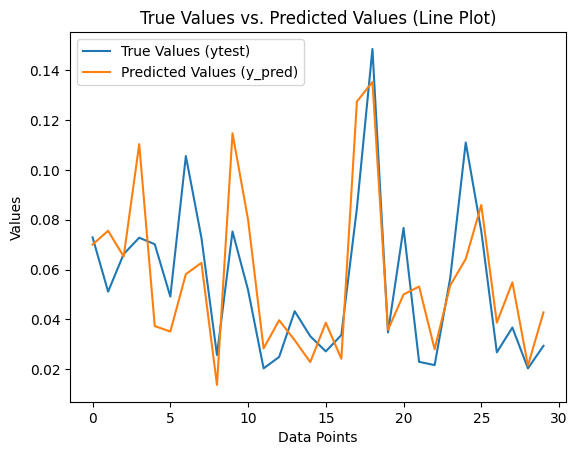

In [62]:
plt.plot(np.arange(30), ytest[:30], label='True Values (ytest)')
plt.plot(np.arange(30), y_pred[:30], label='Predicted Values (y_pred)')
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.title("True Values vs. Predicted Values (Line Plot)")
plt.legend()
plt.show()